# Part 1: Neural Network

### Importing libraries

In [66]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential,model_from_json
from keras.layers import Dense
from keras.optimizers import RMSprop
import pylab as plt

#### Keras is the deep learning library that helps you to code Deep Neural Networks with fewer lines of code 

### Import data

In [69]:
batch_size = 32 #hyperparameter. 128 pixels are passed on at a time
num_classes = 10 #hyperparameter. 10 features = 10 digits
epochs = 10       #epoch is one cycle of forward and backward propogation

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize to 0 to 1 range
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


### Visualize Data

Label: [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


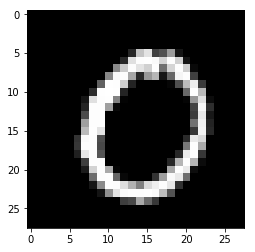

In [70]:
print("Label:",y_test[101:102]) #y stores the label
plt.imshow(x_test[101:102].reshape(28,28), cmap='gray') #x stores the data
plt.show()

#### Note: Images are also considered as numerical matrices

### Design a model

In [71]:
first_layer_size = 64
model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_33 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_34 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_35 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_36 (Dense)             (None, 10)                650       
Total params: 63,370
Trainable params: 63,370
Non-trainable params: 0
_________________________________________________________________


### Weights before Training

Shape of First Layer (784, 64)
Visualization of First Layer


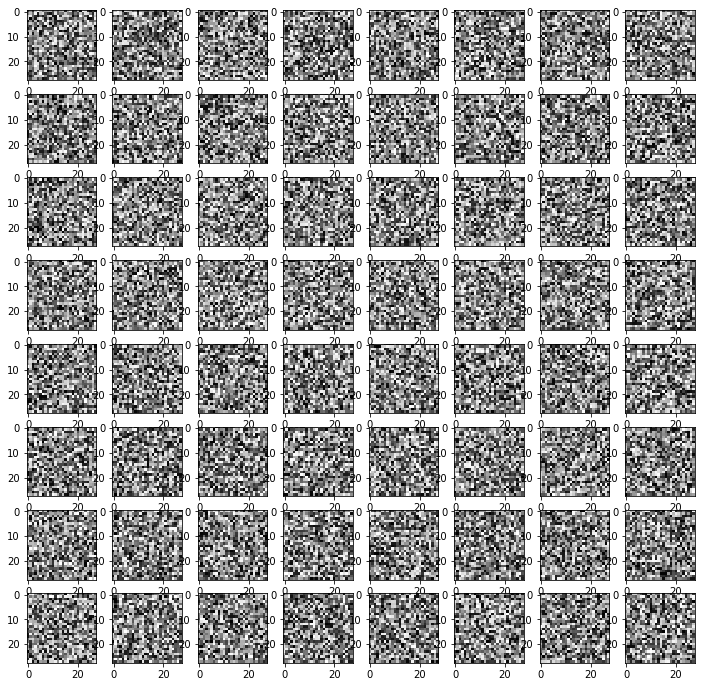

In [72]:
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### Compiling a Model

In [73]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

### Training

In [74]:
# Write the Training input and output variables, size of the batch, number of epochs
history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Epoch 1/10
60000/60000 [==============================] - 7s - loss: 0.7944 - acc: 0.7659     
Epoch 2/10
60000/60000 [==============================] - 6s - loss: 0.2734 - acc: 0.9253     
Epoch 3/10
60000/60000 [==============================] - 6s - loss: 0.1965 - acc: 0.9462     
Epoch 4/10
60000/60000 [==============================] - 7s - loss: 0.1581 - acc: 0.9562     
Epoch 5/10
60000/60000 [==============================] - 6s - loss: 0.1345 - acc: 0.9619     
Epoch 6/10
60000/60000 [==============================] - 7s - loss: 0.1179 - acc: 0.9664     
Epoch 7/10
60000/60000 [==============================] - 7s - loss: 0.1058 - acc: 0.9690     
Epoch 8/10
60000/60000 [==============================] - 8s - loss: 0.0968 - acc: 0.9718     
Epoch 9/10
60000/60000 [==============================] - 9s - loss: 0.0900 - acc: 0.9735     
Epoch 10/10
60000/60000 [==============================] - 7s - loss: 0.0848 - acc: 0.9759     


### Testing

In [75]:
# Write the testing input and output variables
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1209478801894933
Test accuracy: 0.9661


### Weights after Training

Shape of First Layer (784, 64)
Visualization of First Layer


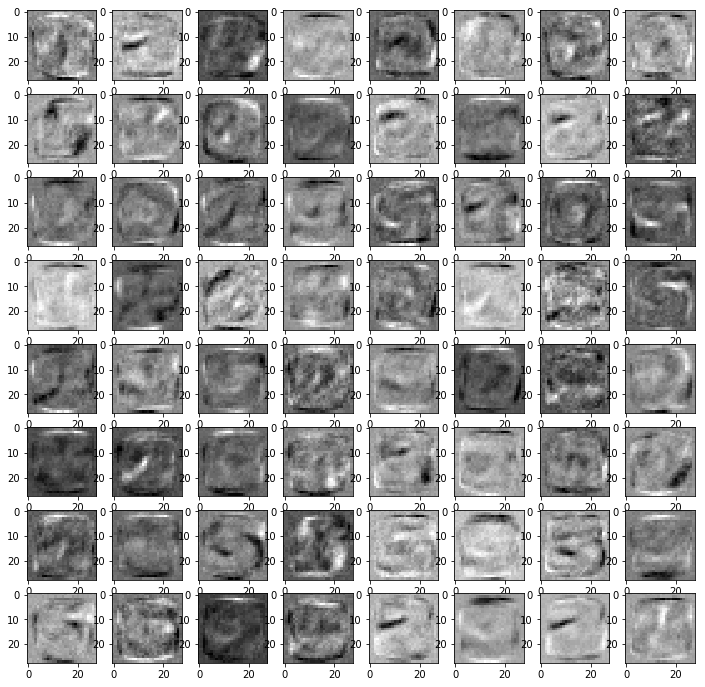

In [76]:
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### Take away
* This internal representation reflects Latent Variables
* Each of the nodes will look for a specific pattern in the input
* A node will get activated if input is similar to the feature it looks for
* Each node is unique and often orthogonal to each other

### Prediction

In [77]:
# Write the index of the test sample to test   !!!!!those values in the output are the softmax score which shows the probability of those digits being the output
prediction = model.predict(x_test[55:56])
prediction = prediction[0]
print('Prediction\n',prediction)
print('\nThresholded output\n',(prediction>0.5)*1)

Prediction
 [9.9935466e-01 4.5567099e-11 1.5213862e-05 2.6294592e-07 8.6329448e-05
 5.0768664e-05 2.3580472e-04 3.0686962e-08 1.7658405e-05 2.3920422e-04]

Thresholded output
 [1 0 0 0 0 0 0 0 0 0]


### Ground truth

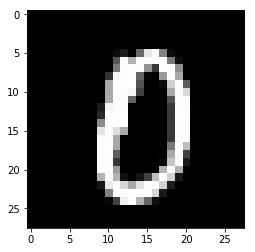

In [78]:
# Write the index of the test sample to show
plt.imshow(x_test[55:56].reshape(28,28),cmap='gray')
plt.show()

### User Input

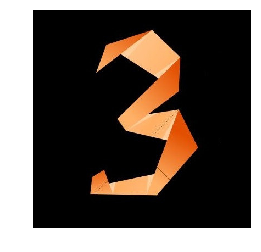

In [79]:
# Load library
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image in color
image_bgr = cv2.imread('digit.jpg', cv2.IMREAD_COLOR)
# Convert to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

### Convert to grayscale and resize

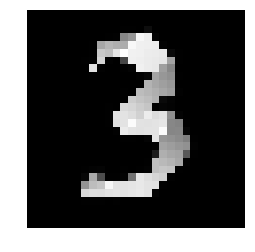

In [80]:
# Load image as grayscale

# Write the path to the image

image = cv2.imread('digit.jpg', cv2.IMREAD_GRAYSCALE)
image_resized = cv2.resize(image, (28, 28)) 
# Show image
plt.imshow(image_resized, cmap='gray'), plt.axis("off")
plt.show()

### Prediction

In [81]:
prediction = model.predict(image_resized.reshape(1,784))
print('Prediction Score:\n',prediction[0])
thresholded = (prediction>0.5)*1
print('\nThresholded Score:\n',thresholded[0])
print('\nPredicted Digit:\n',np.where(thresholded == 1)[1][0])

Prediction Score:
 [1.3016381e-08 1.8134438e-04 1.5557725e-04 9.9906164e-01 5.3408624e-09
 3.6063928e-05 1.1127748e-08 5.0803513e-04 5.5653789e-05 1.6035499e-06]

Thresholded Score:
 [0 0 0 1 0 0 0 0 0 0]

Predicted Digit:
 3


# Part 2: Saving, Loading and Retraining Models

### Saving a model

In [49]:
# serialize model to JSON
model_json = model.to_json()

# Write the file name of the model

with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
# Write the file name of the weights

model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


### Loading a model

In [50]:
# load json and create model

# Write the file name of the model

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
# Write the file name of the weights

loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


### Retraining a model

In [51]:
loaded_model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

history = loaded_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1)
score = loaded_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/5
60000/60000 [==============================] - 1s - loss: 0.3618 - acc: 0.8954     
Epoch 2/5
60000/60000 [==============================] - 2s - loss: 0.3419 - acc: 0.9015     
Epoch 3/5
60000/60000 [==============================] - 1s - loss: 0.3263 - acc: 0.9053     
Epoch 4/5
60000/60000 [==============================] - 1s - loss: 0.3135 - acc: 0.9088     
Epoch 5/5
60000/60000 [==============================] - 1s - loss: 0.3027 - acc: 0.9124     
Test loss: 0.31911553231477735
Test accuracy: 0.9101


### Saving a model and resuming the training later is the great relief in training large neural networks !

# Part 3: Activation Functions

### Sigmoid Activation Function

In [52]:
model = Sequential()
model.add(Dense(8, activation='sigmoid', input_shape=(784,)))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 8)                 6280      
_________________________________________________________________
dense_25 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_26 (Dense)             (None, 10)                90        
Total params: 6,442
Trainable params: 6,442
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 1s - loss: 2.0400 - acc: 0.4286 - val_loss: 1.7618 - val_acc: 0.6229
Epoch 2/5
60000/60000 [==============================] - 2s - loss: 1.5273 - acc: 0.6725 - val_loss: 1.2960 - val_acc: 0.7296
Epoch 3/5
60000/60000 [==============================] - 1s - loss: 1.1252 - acc: 0.7532 - val_loss: 0

### Relu Activation Function

In [1]:
# Write your code here 

# Use the same model design from the above cell 

### What are your findings?

### Other Activation Functions
* model.add(Dense(8, activation='tanh'))
* model.add(Dense(8, activation='linear'))
* model.add(Dense(8, activation='hard_sigmoid'))

### Tips
* Relu is commonly used in most hidden layers
* In case of dead neurons, use leaky Relu

# Part 4: Design Choices in Neural Networks

### Design a model with Low Number of Nodes. For Example 8

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 8)                 6280      
_________________________________________________________________
dense_22 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_23 (Dense)             (None, 10)                330       
Total params: 6,898
Trainable params: 6,898
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s - loss: 1.7979 - acc: 0.5259 - val_loss: 1.3009 - val_acc: 0.6995
Epoch 2/5
60000/60000 [==============================] - 1s - loss: 0.9600 - acc: 0.7762 - val_loss: 0.7003 - val_acc: 0.8354
Epoch 3/5
60000/60000 [==============================] - 1s - loss: 0.5752 - acc: 0.8547 - val_loss: 0

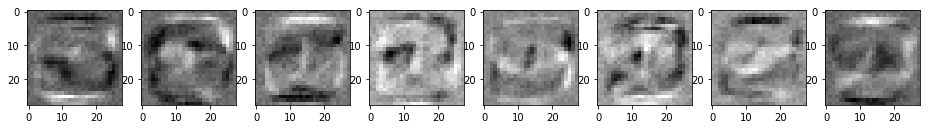

In [44]:
first_layer_size = 8

model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(16, 16))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### Design a model with Higher Number of Nodes. For example 128

In [2]:
# Write your code here 

# Use the same layer design from the above cell 

### Lower number of Layers. For example 1 hidden layer

In [35]:
model = Sequential()
model.add(Dense(4, activation='relu', input_shape=(784,)))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_18 (Dense)             (None, 10)                50        
Total params: 3,190
Trainable params: 3,190
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 13s - loss: 1.4883 - acc: 0.5105 - val_loss: 1.0582 - val_acc: 0.6926
Epoch 2/2
60000/60000 [==============================] - 9s - loss: 0.9245 - acc: 0.7255 - val_loss: 0.7732 - val_acc: 0.7702
Test loss: 0.7731845590591431
Test accuracy: 0.7702


### Lower number of Layers. For example 4 hidden layers

In [3]:
# Write your code here 

# Use the same number of units from the above cell 


### Tips
* Choice of number of nodes and layers are application oriented i.e. trial and error
* Designing a neural network and reasoning the results is more of an art than a science